In [44]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

## grid:

In [45]:
Lx = 2.0
Ly = 2.0
nx = 101
ny = 101
dx = Lx/(nx-1)
dy = Ly/(ny-1)

## Time:

In [46]:
cfl = 0.2
umax = 1.0
dt = cfl*dx/umax
T = 0.5

## Initialize field u and v:

In [47]:
u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))
u[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0

v = numpy.ones((ny,nx))
vn = numpy.ones((ny,nx))
v[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0

## Plot initial condition:

In [48]:

x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)

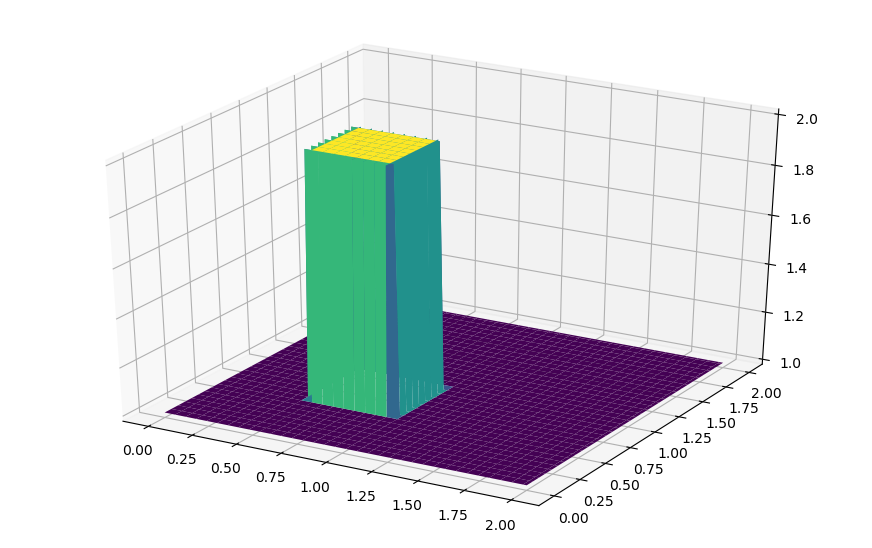

In [49]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, v[:], cmap=cm.viridis)

## Start time loop: 

In [50]:
t = 0.0
while t<T:
    t+=dt
    un = u.copy()
    vn = v.copy()
    u[1:-1,1:-1] = un[1:-1,1:-1] - (un[1:-1,1:-1]*dt/dx)*(un[1:-1,1:-1] - un[1:-1,0:-2]) - (vn[1:-1,1:-1]*dt/dy)*(un[1:-1,1:-1] - un[0:-2,1:-1])
    v[1:-1,1:-1] = vn[1:-1,1:-1] - (un[1:-1,1:-1]*dt/dx)*(vn[1:-1,1:-1] - vn[1:-1,0:-2]) - (vn[1:-1,1:-1]*dt/dy)*(vn[1:-1,1:-1] - vn[0:-2,1:-1])


## Plot python solution

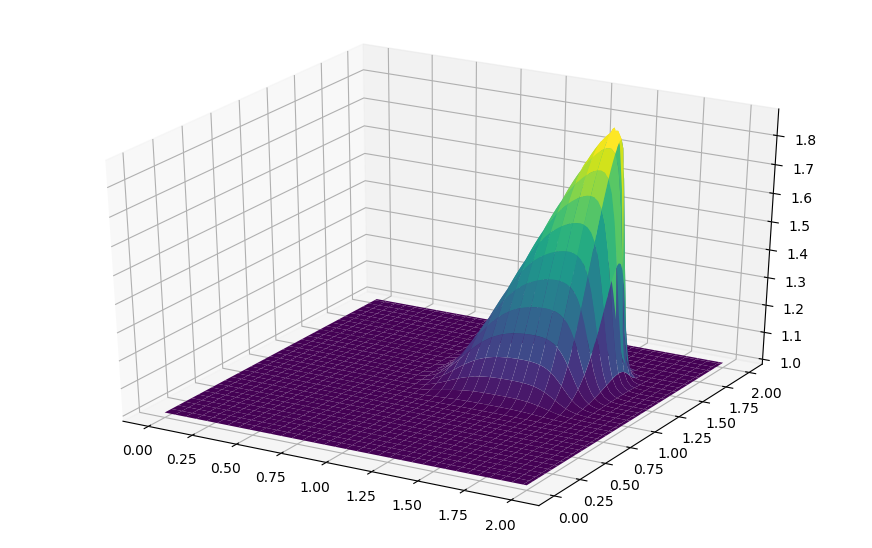

In [51]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, v[:], cmap=cm.viridis)

## Plot c++ solution:

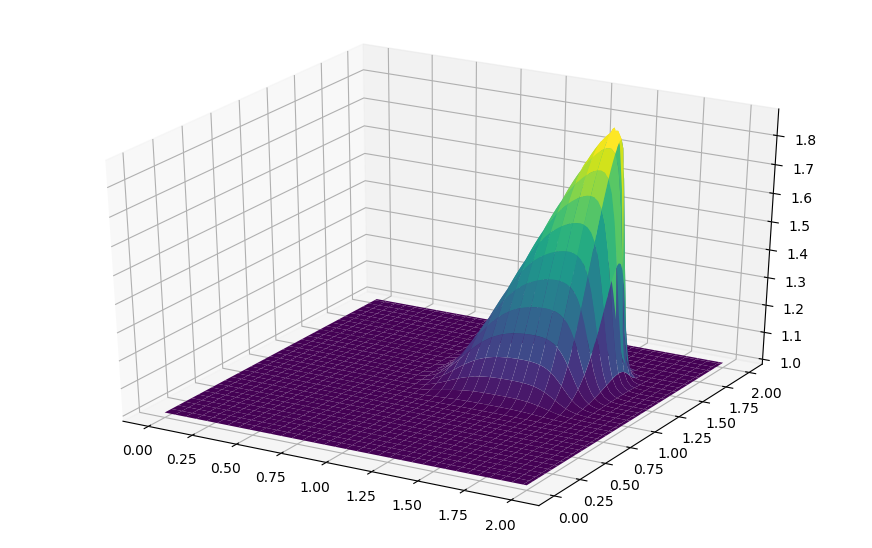

In [52]:
xc = numpy.loadtxt('plot/x.dat')
yc = numpy.loadtxt('plot/y.dat')
vc = numpy.loadtxt('plot/u.dat')

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
Xc, Yc = numpy.meshgrid(xc, yc)                            
surf = ax.plot_surface(Xc, Yc, vc[:], cmap=cm.viridis)

## Error between c++ and python solution

In [53]:
error = v - vc
from numpy import linalg as LA
LA.norm(error)

2.1133109359307024e-12